# Data Exploration

This notebook aims to explore BTCUSDT dataset

In [1]:
## Libraries
import sys
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import plotly.io as pio
from IPython.display import Image


In [2]:
sys.path.append(os.path.abspath(os.path.join("../scripts"))) 

from log_helper import AppLog
app_logger = AppLog("../logs/eda.log").get_app_logger()

from plots import plotSimpleCol, mplfinancePlot, plotlyPlotCandlestick

### Import the dataset

## 1 minute data from 11/09/2022 to 13/09/2022

In [3]:
btcusddf = pd.read_csv('../data/BTCUSDT_2days_data.csv')

In [4]:
btcusddf.head()

,Date,Open,High,Low,Close,Volume,QuoteVolume
0,"9/11/2022, 12:00:00 AM",21647.21,21666.22,21637.01,21652.68,348.00521,1662854459999
1,"9/11/2022, 12:01:00 AM",21652.68,21660.58,21650.28,21655.31,132.51217,1662854519999
2,"9/11/2022, 12:02:00 AM",21655.31,21661.67,21644.68,21660.77,147.52758,1662854579999
3,"9/11/2022, 12:03:00 AM",21660.04,21679.95,21660.04,21661.41,194.46260,1662854639999
4,"9/11/2022, 12:04:00 AM",21661.41,21662.65,21647.18,21655.69,241.24041,1662854699999


### Global description

In [5]:
btcusddf.dtypes

Date            object
Open           float64
High           float64
Low            float64
Close          float64
Volume         float64
QuoteVolume      int64
dtype: object

In [6]:
btcusddf.Date = pd.to_datetime(btcusddf.Date)

In [7]:
df = btcusddf.copy()
df.set_index('Date', inplace=True)

In [8]:
df.head()

,Open,High,Low,Close,Volume,QuoteVolume
Date,,,,,,
2022-09-11 00:00:00,21647.21,21666.22,21637.01,21652.68,348.00521,1662854459999
2022-09-11 00:01:00,21652.68,21660.58,21650.28,21655.31,132.51217,1662854519999
2022-09-11 00:02:00,21655.31,21661.67,21644.68,21660.77,147.52758,1662854579999
2022-09-11 00:03:00,21660.04,21679.95,21660.04,21661.41,194.46260,1662854639999
2022-09-11 00:04:00,21661.41,21662.65,21647.18,21655.69,241.24041,1662854699999


In [9]:
cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'QuoteVolume']
df[cols].describe()

,Open,High,Low,Close,Volume,QuoteVolume
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03
mean,21879.092347,21891.489020,21867.447657,21879.268773,235.084936,1.662944e+12
std,324.542962,326.792062,322.607994,324.577113,138.203408,5.197018e+07
min,21371.650000,21383.450000,21350.000000,21371.650000,28.268320,1.662854e+12
25%,21609.792500,21617.817500,21601.437500,21609.920000,150.949990,1.662899e+12
50%,21703.245000,21716.175000,21693.730000,21703.430000,201.939690,1.662944e+12
75%,22239.295000,22250.247500,22224.680000,22238.555000,279.471617,1.662989e+12
max,22456.820000,22488.000000,22446.250000,22456.820000,1790.177740,1.663034e+12


## Exploration

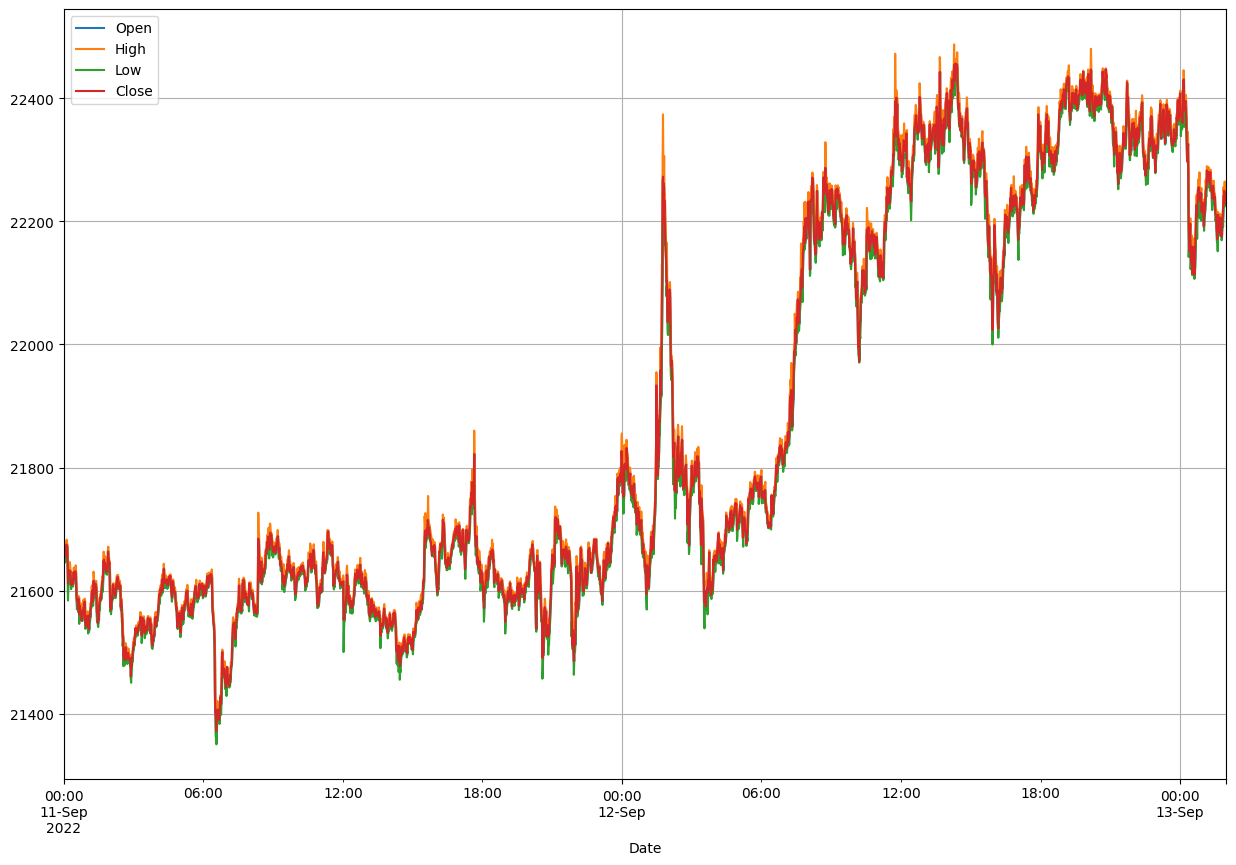

In [10]:
plotSimpleCol(df, cols[0:4])

/home/josias_ounsinli/.local/lib/python3.8/site-packages/mplfinance/_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
/home/josias_ounsinli/.local/lib/python3.8/site-packages/mplfinance/_styles.py:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style['base_mpl_style'])


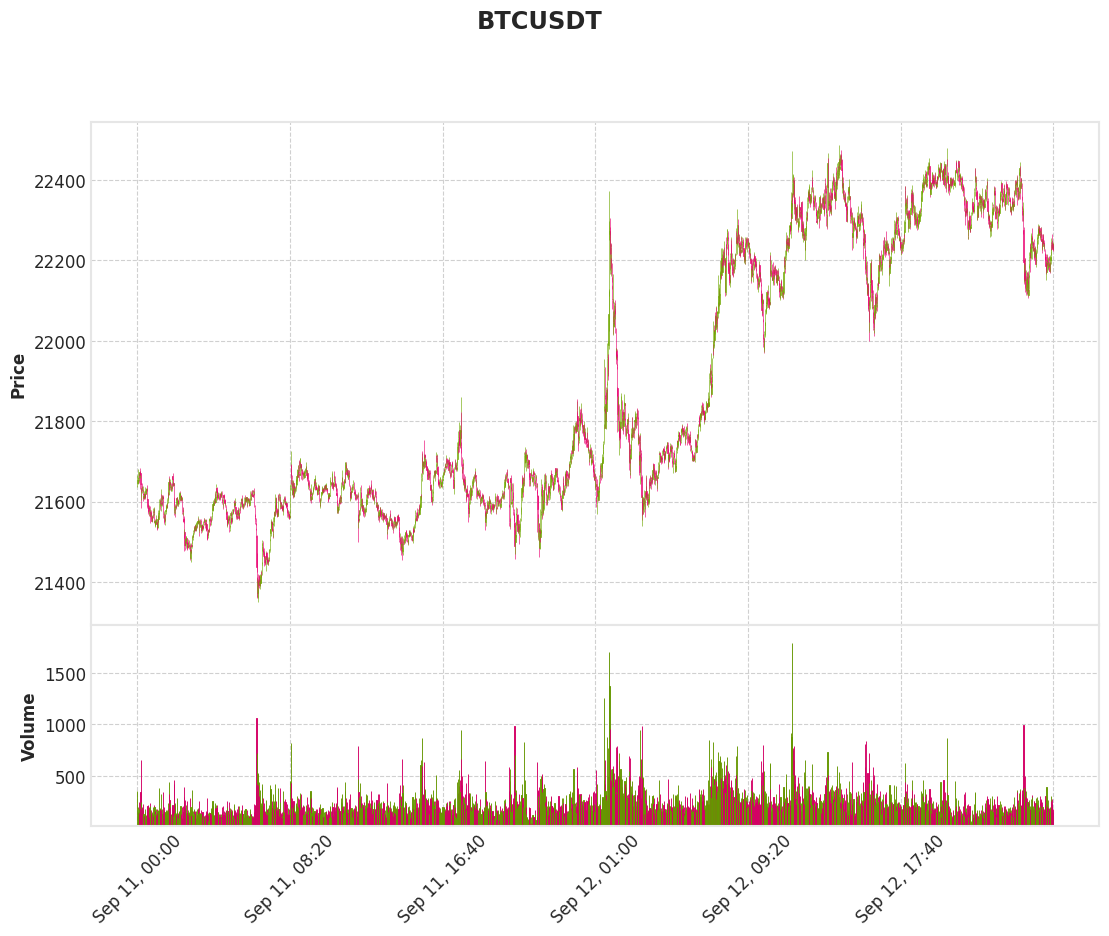

In [11]:
candle_infos = ['Open', 'High', 'Low', 'Close', 'Volume']
mplfinancePlot(df, candle_infos, type='candle', style='binance', volume=True, figscale=1.75, title='BTCUSDT')


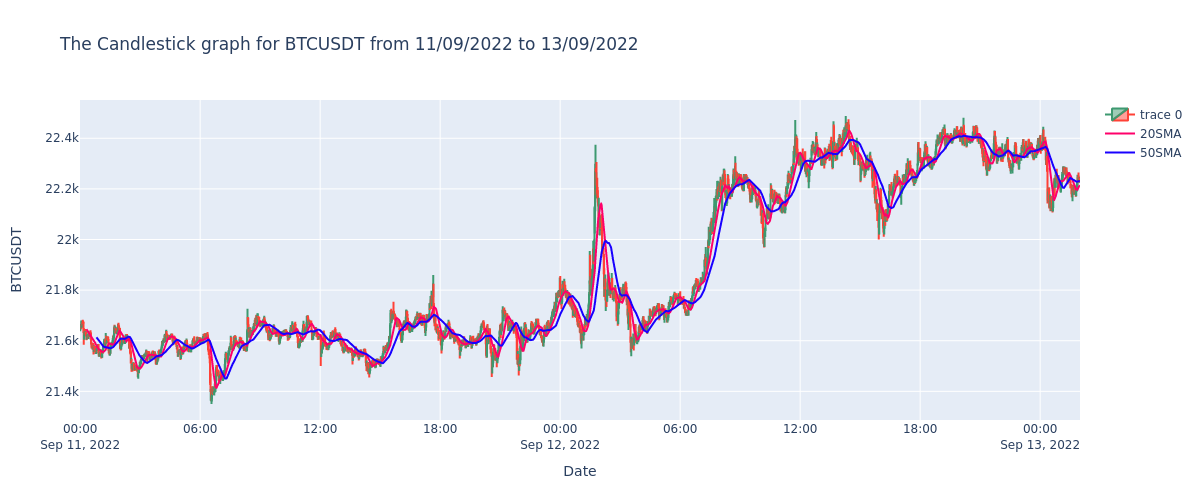

In [12]:
fig = plotlyPlotCandlestick(df, sma=20, lma=50, title='The Candlestick graph for BTCUSDT from 11/09/2022 to 13/09/2022')
Image(pio.to_image(fig, format='png', width=1200))

## Closing value

## Returns

1. First approach: return in percentage (change in percentage)
$$
\frac{price_t}{price_{t-1}} - 1
$$

2. Second approach: buy and hold strategy
We calculate the return percentage, where $t$ represents a certain time period and $price_0$ is initial closing price:

$$
return_{t, 0} = \frac{price_t}{price_0}
$$

In [13]:
df['Return1'] = df['Close'].pct_change()
df['Return2'] = df.apply(lambda x: x / x[0])['Close']

In [14]:
df

,Open,High,Low,Close,Volume,QuoteVolume,Return1,Return2
Date,,,,,,,,
2022-09-11 00:00:00,21647.21,21666.22,21637.01,21652.68,348.00521,1662854459999,NaN,1.000000
2022-09-11 00:01:00,21652.68,21660.58,21650.28,21655.31,132.51217,1662854519999,0.000121,1.000121
2022-09-11 00:02:00,21655.31,21661.67,21644.68,21660.77,147.52758,1662854579999,0.000252,1.000374
2022-09-11 00:03:00,21660.04,21679.95,21660.04,21661.41,194.46260,1662854639999,0.000030,1.000403
2022-09-11 00:04:00,21661.41,21662.65,21647.18,21655.69,241.24041,1662854699999,-0.000264,1.000139
...,...,...,...,...,...,...,...,...
2022-09-13 01:55:00,22250.82,22264.89,22241.05,22246.29,276.57971,1663034159999,-0.000173,1.027415
2022-09-13 01:56:00,22244.98,22247.01,22232.23,22242.36,226.43521,1663034219999,-0.000177,1.027234
2022-09-13 01:57:00,22242.19,22244.26,22224.71,22228.41,143.60355,1663034279999,-0.000627,1.026589


<AxesSubplot: xlabel='Date'>

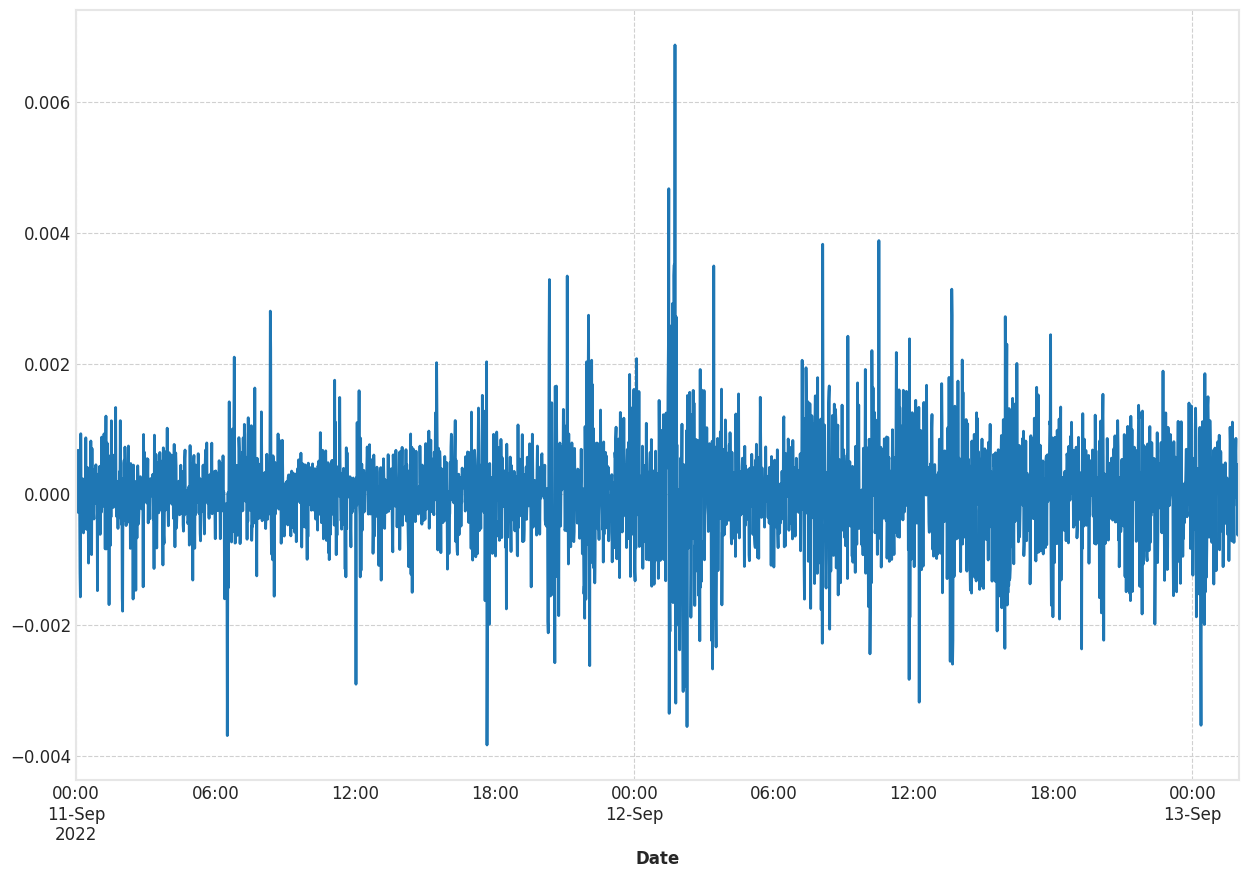

In [15]:
df['Return1'].plot(style=['-'], figsize=(15,10))

<AxesSubplot: >

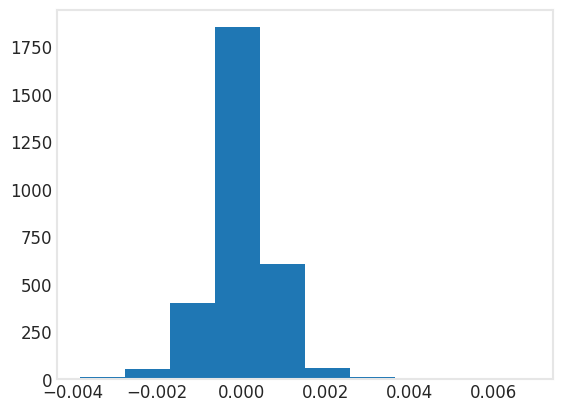

In [16]:
df['Return1'].hist(grid=False)

In [17]:
## Percentage increase
ret_perc = df.Return2.tail(1) * 100
print(f'An increase of {round(ret_perc[0], 2)}%')
print(f'With a starting capital of 1000$ on 11/09/22, using the buy and hold strategy, the balance on 13/09/2022 will be: {1000 + round(df.Return2.tail(1)[0]*1000, 2)}$')

An increase of 102.7%
With a starting capital of 1000$ on 11/09/22, using the buy and hold strategy, the balance on 13/09/2022 will be: 2027.0$


## Daily data from 01/01/2022

In [18]:
dailydf = pd.read_csv('../data/BTCUSDT_JantoSep_data.csv')

In [19]:
dailydf.head()

,Date,Open,High,Low,Close,Volume,QuoteVolume
0,"1/1/2022, 12:00:00 AM",46216.93,47954.63,46208.37,47722.65,19604.46325,1641081599999
1,"1/2/2022, 12:00:00 AM",47722.66,47990.00,46654.00,47286.18,18340.46040,1641167999999
2,"1/3/2022, 12:00:00 AM",47286.18,47570.00,45696.00,46446.10,27662.07710,1641254399999
3,"1/4/2022, 12:00:00 AM",46446.10,47557.54,45500.00,45832.01,35491.41360,1641340799999
4,"1/5/2022, 12:00:00 AM",45832.01,47070.00,42500.00,43451.13,51784.11857,1641427199999


In [20]:
dailydf.Date = pd.to_datetime(dailydf.Date)
dailydf.set_index('Date', inplace=True)
dailydf

,Open,High,Low,Close,Volume,QuoteVolume
Date,,,,,,
2022-01-01,46216.93,47954.63,46208.37,47722.65,19604.46325,1641081599999
2022-01-02,47722.66,47990.00,46654.00,47286.18,18340.46040,1641167999999
2022-01-03,47286.18,47570.00,45696.00,46446.10,27662.07710,1641254399999
2022-01-04,46446.10,47557.54,45500.00,45832.01,35491.41360,1641340799999
2022-01-05,45832.01,47070.00,42500.00,43451.13,51784.11857,1641427199999
...,...,...,...,...,...,...
2022-10-08,19530.09,19627.38,19237.14,19417.96,102480.09842,1665273599999
2022-10-09,19416.52,19558.00,19316.04,19439.02,113900.82681,1665359999999
2022-10-10,19439.96,19525.00,19020.25,19131.87,212509.09849,1665446399999


In [21]:
cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'QuoteVolume']
dailydf[cols].describe()

,Open,High,Low,Close,Volume,QuoteVolume
count,285.000000,285.000000,285.000000,285.000000,285.000000,2.850000e+02
mean,31180.857614,31909.948667,30317.095789,31085.744737,118198.613690,1.653350e+12
std,9701.182007,9894.376310,9485.304426,9686.152152,106096.243816,7.120796e+09
min,18461.360000,19180.210000,17622.000000,18461.360000,15805.447180,1.641082e+12
25%,21195.600000,21684.540000,20655.000000,21140.070000,42192.748520,1.647216e+12
50%,30074.230000,30709.990000,29282.360000,29919.210000,67877.364150,1.653350e+12
75%,40480.010000,41500.000000,39285.000000,40426.080000,174383.220460,1.659485e+12
max,47722.660000,48189.840000,46950.850000,47722.650000,593260.741610,1.665619e+12


### Exploration

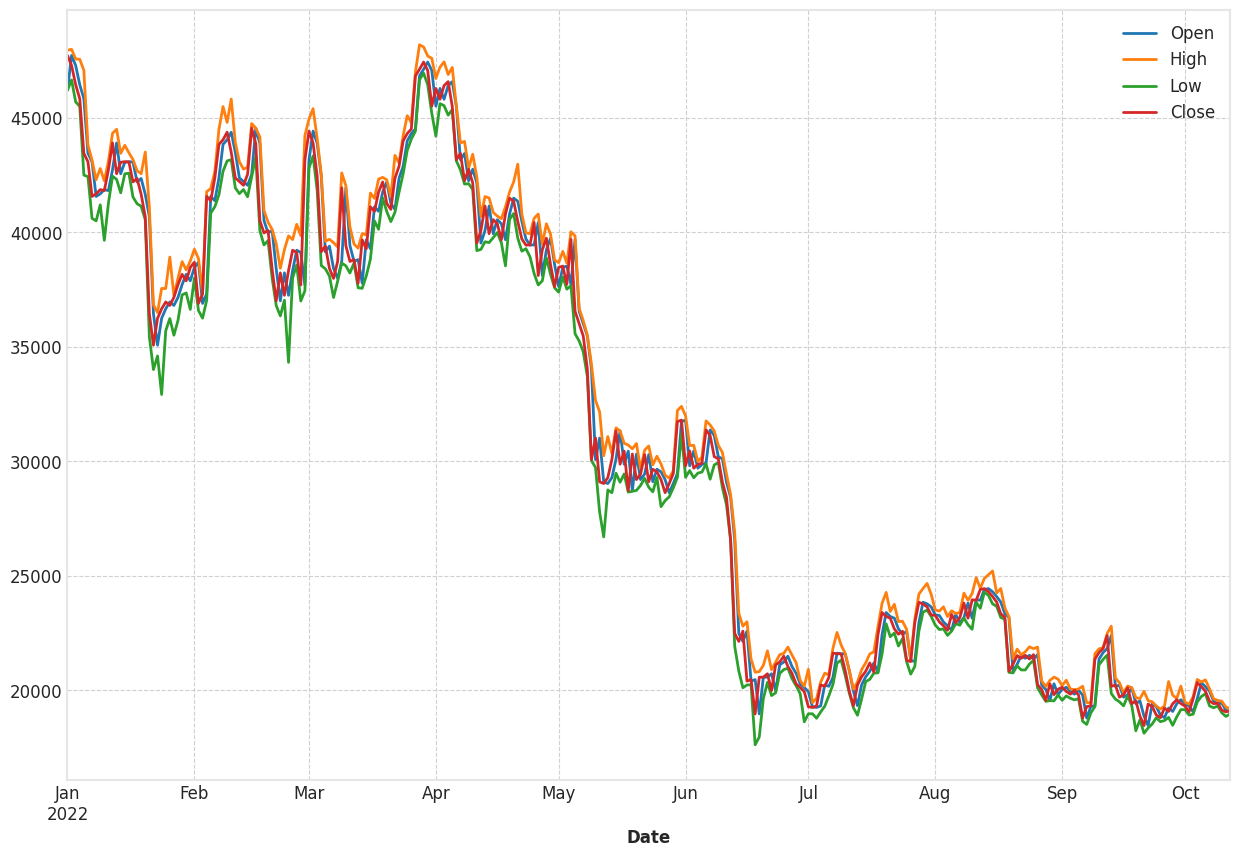

In [22]:
plotSimpleCol(dailydf, cols[0:4])

/home/josias_ounsinli/.local/lib/python3.8/site-packages/mplfinance/_styles.py:24: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



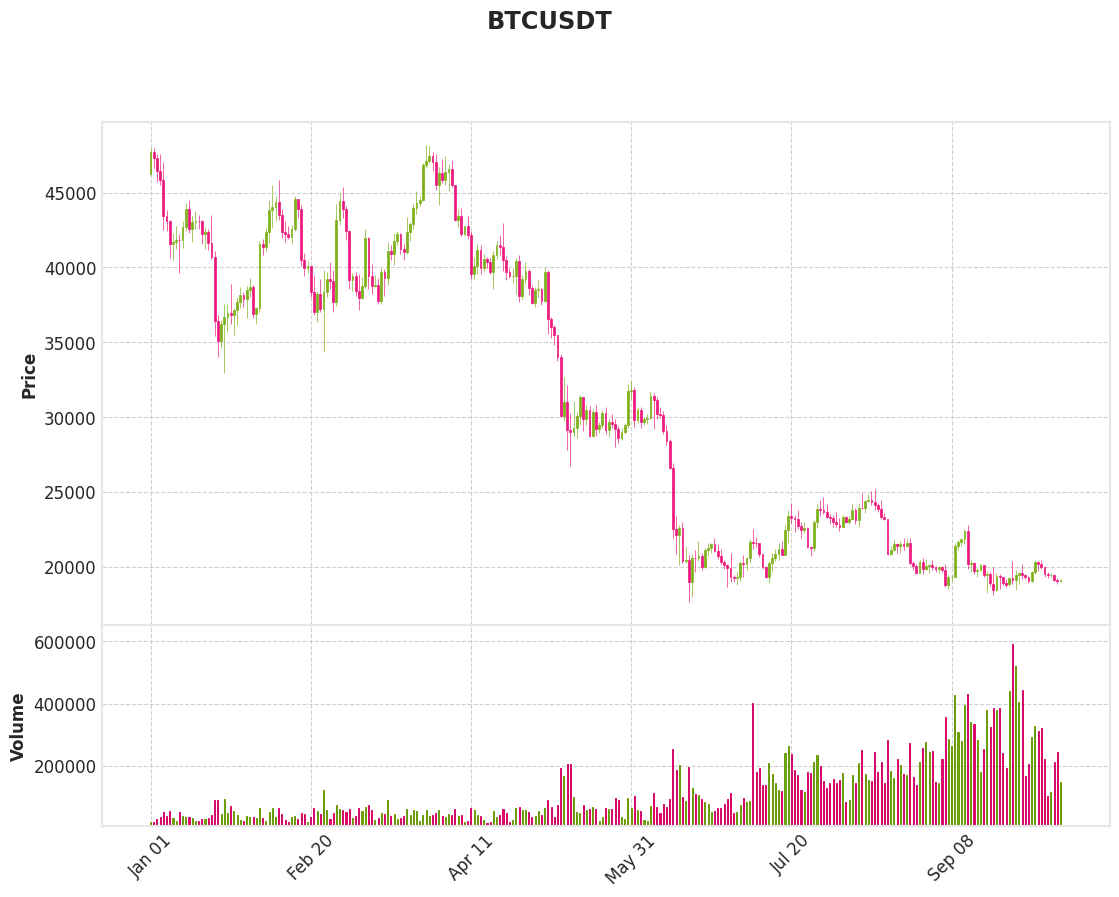

In [23]:
candle_infos = ['Open', 'High', 'Low', 'Close', 'Volume']
mplfinancePlot(dailydf, candle_infos, type='candle', style='binance', volume=True, figscale=1.75, title='BTCUSDT')


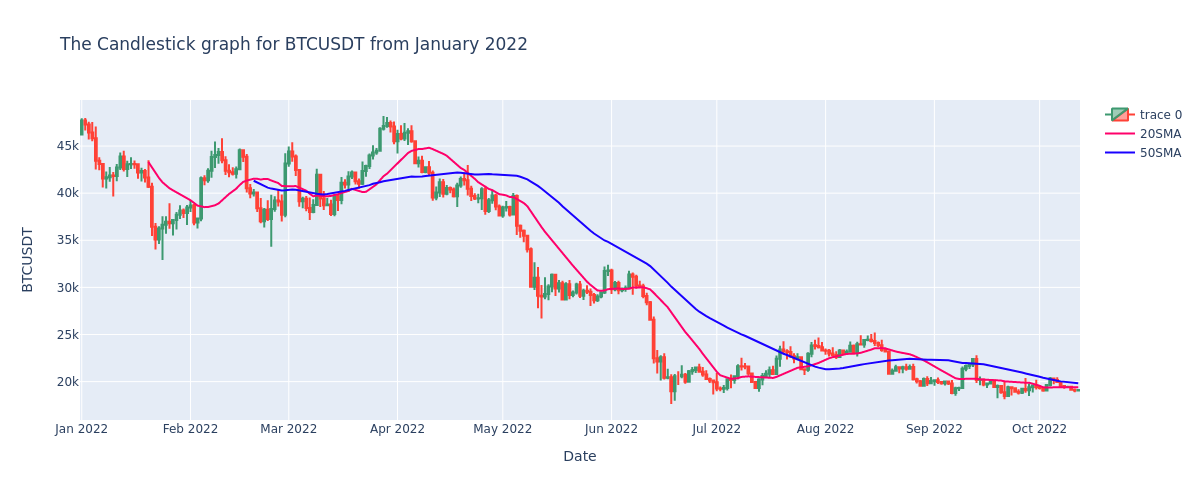

In [24]:
fig = plotlyPlotCandlestick(dailydf, sma=20, lma=50, title='The Candlestick graph for BTCUSDT from January 2022')
Image(pio.to_image(fig, format='png', width=1200))

### Closing value

## Return

We can notice a downtrend on this period, what was not the case on the 1m data. Then, the return2 here will base on a sell and hold strategy.

In [25]:
dailydf['Return1'] = dailydf['Close'].pct_change()
dailydf['Return2'] = dailydf.apply(lambda x: x[0] / x)['Close']

In [26]:
dailydf

,Open,High,Low,Close,Volume,QuoteVolume,Return1,Return2
Date,,,,,,,,
2022-01-01,46216.93,47954.63,46208.37,47722.65,19604.46325,1641081599999,NaN,1.000000
2022-01-02,47722.66,47990.00,46654.00,47286.18,18340.46040,1641167999999,-0.009146,1.009230
2022-01-03,47286.18,47570.00,45696.00,46446.10,27662.07710,1641254399999,-0.017766,1.027485
2022-01-04,46446.10,47557.54,45500.00,45832.01,35491.41360,1641340799999,-0.013222,1.041252
2022-01-05,45832.01,47070.00,42500.00,43451.13,51784.11857,1641427199999,-0.051948,1.098306
...,...,...,...,...,...,...,...,...
2022-10-08,19530.09,19627.38,19237.14,19417.96,102480.09842,1665273599999,-0.005741,2.457655
2022-10-09,19416.52,19558.00,19316.04,19439.02,113900.82681,1665359999999,0.001085,2.454993
2022-10-10,19439.96,19525.00,19020.25,19131.87,212509.09849,1665446399999,-0.015801,2.494406


<AxesSubplot: xlabel='Date'>

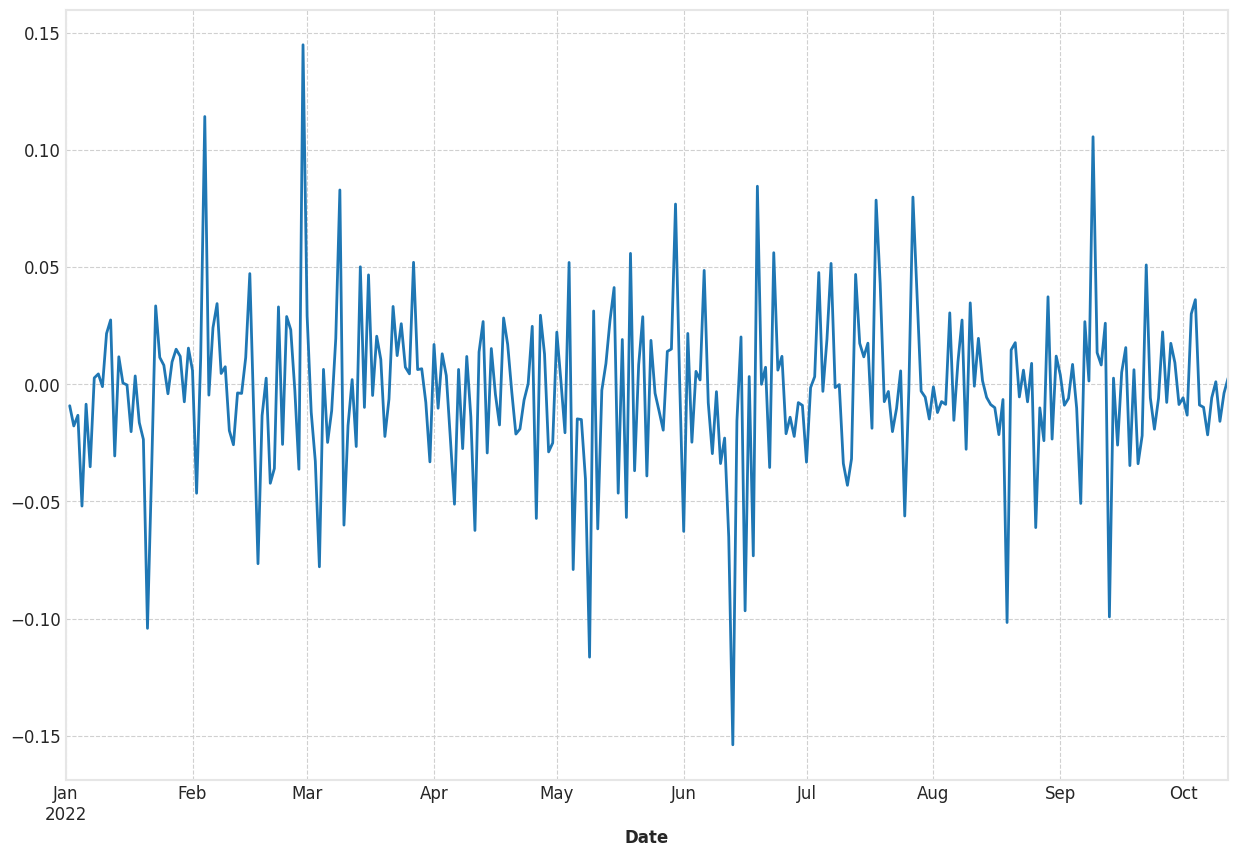

In [27]:
# Change in percentage
dailydf['Return1'].plot(style=['-'], figsize=(15,10))

In [28]:
dailydf.Return1.mean()

-0.0026124530662390176

On average, on the period, we notice a daily decreasing of 0.26% compared to the previous day.

<AxesSubplot: >

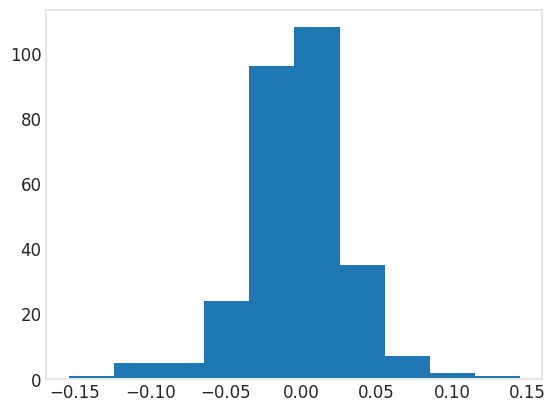

In [29]:
dailydf['Return1'].hist(grid=False)

In [30]:
## Percentage increase
ret_perc = dailydf.Return2.tail(1) * 100
print(f'An increase of {round(ret_perc[0], 2)}%')
print(f'With a starting capital of 1000$ on 01/01/22, using the sell and hold strategy, the balance on 12/10/2022 will be: {1000 + round(dailydf.Return2.tail(1)[0]*1000, 2)}$')


An increase of 249.72%
With a starting capital of 1000$ on 01/01/22, using the sell and hold strategy, the balance on 12/10/2022 will be: 3497.16$


In [2]:
import pandas as pd
btcusddf = pd.read_csv('../data/BTCUSDT_2days_data.csv')

In [6]:
btcusddf.head(5)

,Date,Open,High,Low,Close,Volume,QuoteVolume
0,"9/11/2022, 12:00:00 AM",21647.21,21666.22,21637.01,21652.68,348.00521,1662854459999
1,"9/11/2022, 12:01:00 AM",21652.68,21660.58,21650.28,21655.31,132.51217,1662854519999
2,"9/11/2022, 12:02:00 AM",21655.31,21661.67,21644.68,21660.77,147.52758,1662854579999
3,"9/11/2022, 12:03:00 AM",21660.04,21679.95,21660.04,21661.41,194.46260,1662854639999
4,"9/11/2022, 12:04:00 AM",21661.41,21662.65,21647.18,21655.69,241.24041,1662854699999
